In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [16]:
df = pd.read_csv("../input/rawdata/ENSO.csv")

In [17]:
df.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1/1/1950,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,2/1/1950,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,3/1/1950,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,4/1/1950,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,5/1/1950,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [18]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

       Date  Year Month  Global Temperature Anomalies  Nino 1+2 SST  \
0  1/1/1950  1950   JAN                         -0.20           NaN   
1  2/1/1950  1950   FEB                         -0.26           NaN   
2  3/1/1950  1950   MAR                         -0.08           NaN   
3  4/1/1950  1950   APR                         -0.16           NaN   
4  5/1/1950  1950   MAY                         -0.02           NaN   

   Nino 1+2 SST Anomalies  Nino 3 SST  Nino 3 SST Anomalies  Nino 3.4 SST  \
0                     NaN         NaN                   NaN           NaN   
1                     NaN         NaN                   NaN           NaN   
2                     NaN         NaN                   NaN           NaN   
3                     NaN         NaN                   NaN           NaN   
4                     NaN         NaN                   NaN           NaN   

   Nino 3.4 SST Anomalies  ...    TNI   PNA  OLR  SOI  Season (2-Month)  \
0                     NaN  ...  0.6

In [19]:
df.isna().sum(axis=0)

Date                              0
Year                              0
Month                             0
Global Temperature Anomalies      0
Nino 1+2 SST                    384
Nino 1+2 SST Anomalies          384
Nino 3 SST                      384
Nino 3 SST Anomalies            384
Nino 3.4 SST                    384
Nino 3.4 SST Anomalies          384
Nino 4 SST                      384
Nino 4 SST Anomalies            384
TNI                               7
PNA                               0
OLR                             308
SOI                              12
Season (2-Month)                  0
MEI.v2                          348
Season (3-Month)                  0
ONI                               0
Season (12-Month)                 0
ENSO Phase-Intensity              6
dtype: int64

As we are going to perform a time series forecasting, we need to reindex the dataset using the date as it.

In [21]:
df.set_index('Date', inplace = True)

In [22]:
df.head()

,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
Date,,,,,,,,,,,,,,,,,,,,,
1/1/1950,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
2/1/1950,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
3/1/1950,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
4/1/1950,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
5/1/1950,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


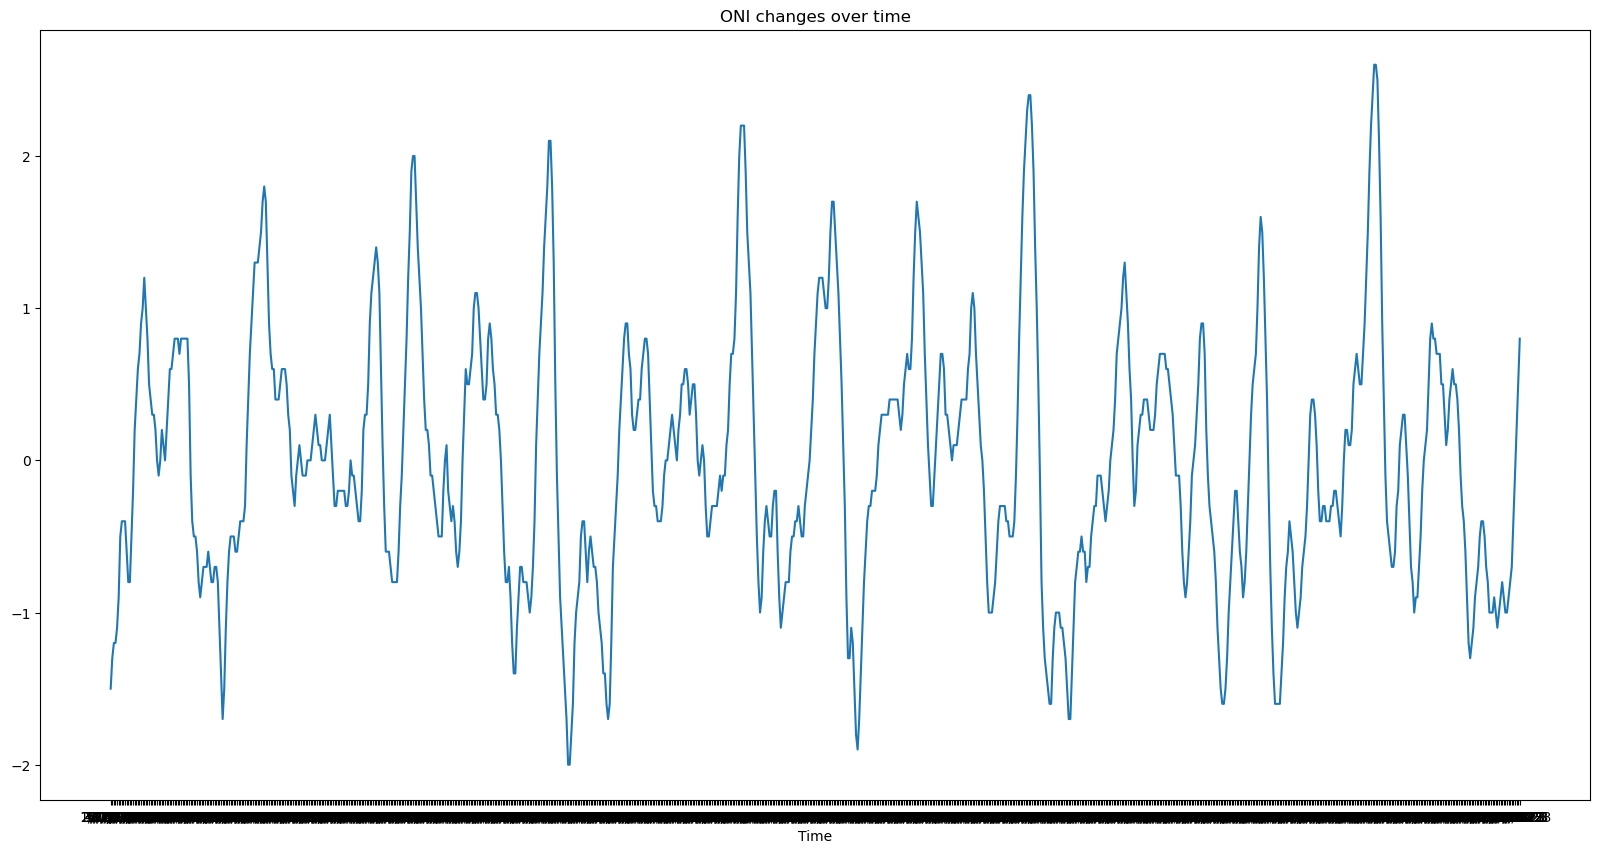

: 

In [25]:
plt.figure(figsize=(20,10))
plt.plot(df.ONI)
plt.title('ONI changes over time')
plt.xlabel('Time')
plt.show()